In [1]:
import sympy as sp
from sympy.abc import t, u, v, w
from einsteinpy.symbolic import MetricTensor, RicciTensor, RicciScalar, RiemannCurvatureTensor, EinsteinTensor
from einsteinpy.symbolic.christoffel import ChristoffelSymbols
import numpy as np
from IPython.display import Markdown as md
from IPython.display import display, Latex
import warnings
warnings.filterwarnings("ignore")

sp.init_printing()
f = sp.Function('f')(t, u, v)
g = sp.Function('g')(t, u, v)
R = sp.Function('R')(t)
W = sp.Function('W')(t)

vars_ = ["t", "u", "v", "w"] 

def print_ein(ein):
    ein = ein.simplify()
    for i, c1 in enumerate(vars_):
        for j, c2 in enumerate(vars_):
            if ein[i, j] != (u - u).simplify():
                display(f"Element {(c1, c2)}, of Einstein tensor", sp.factor(ein[i, j]))
                print("\n\n")

x = (R + W * v * sp.cos(u/2))*sp.cos(u)
y = (R + W * v * sp.cos(u/2))*sp.sin(u)
z = W * v * sp.sin(u/2)

dxu = x.diff(u)
dxv = x.diff(v)
dxt = x.diff(t)
dyu = y.diff(u)
dyv = y.diff(v)
dyt = y.diff(t)
dzu = z.diff(u)
dzv = z.diff(v)
dzt = z.diff(t)

du2 = (dxu**2 + dyu**2 + dzu**2).simplify()
dv2 = (dxv**2 + dyv**2 + dzv**2).simplify()
dt2 = (dxt**2 + dyt**2 + dzt**2).simplify()

ds_ = [dt2, -du2, -dv2]

out = "ds^2 ="
vars_ = ["t", "u", "v"] 

for i in range(3):
    out += f"+\\left({sp.latex(ds_[i].simplify())}\\right)d{vars_[i]}^2"
    
md("Line element: \n$${}$$".format(out))

Line element: 
$$ds^2 =+\left(v^{2} \left(\frac{d}{d t} W{\left(t \right)}\right)^{2} + 2 v \cos{\left(\frac{u}{2} \right)} \frac{d}{d t} R{\left(t \right)} \frac{d}{d t} W{\left(t \right)} + \left(\frac{d}{d t} R{\left(t \right)}\right)^{2}\right)dt^2+\left(v^{2} W^{2}{\left(t \right)} \sin^{2}{\left(\frac{u}{2} \right)} - \frac{5 v^{2} W^{2}{\left(t \right)}}{4} - 2 v R{\left(t \right)} W{\left(t \right)} \cos{\left(\frac{u}{2} \right)} - R^{2}{\left(t \right)}\right)du^2+\left(- W^{2}{\left(t \right)}\right)dv^2$$

"Element ('t', 't'), of Einstein tensor"

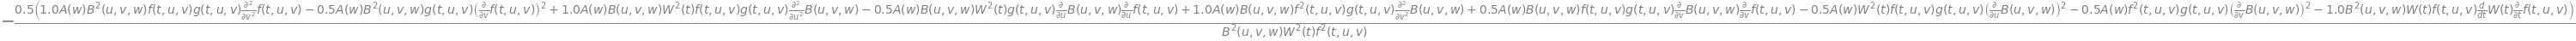

"Element ('t', 'u'), of Einstein tensor"

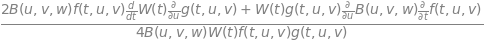

"Element ('t', 'v'), of Einstein tensor"

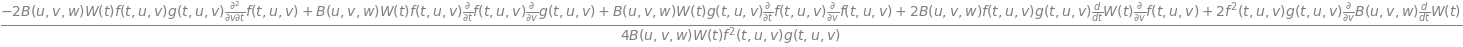

"Element ('t', 'w'), of Einstein tensor"

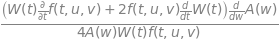

"Element ('u', 't'), of Einstein tensor"

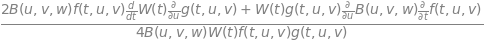

"Element ('u', 'u'), of Einstein tensor"

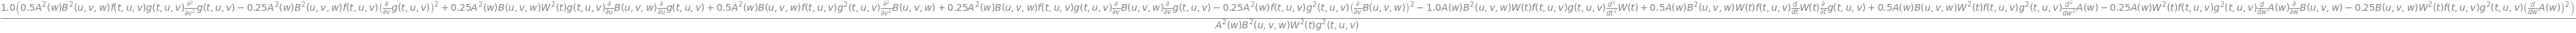

"Element ('u', 'v'), of Einstein tensor"

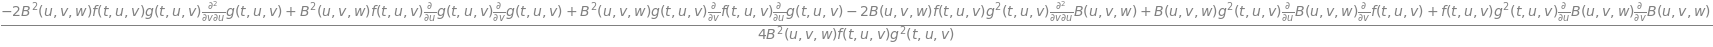

"Element ('u', 'w'), of Einstein tensor"

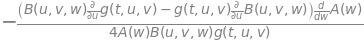

"Element ('v', 't'), of Einstein tensor"

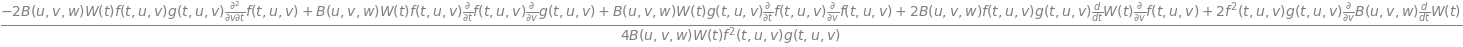

"Element ('v', 'u'), of Einstein tensor"

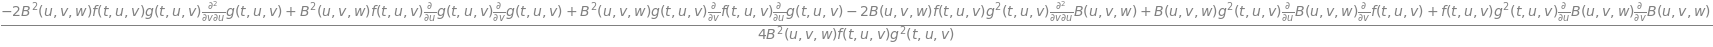

"Element ('v', 'v'), of Einstein tensor"

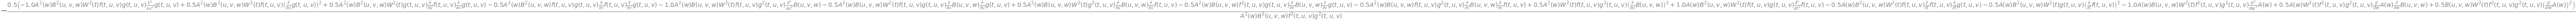

"Element ('v', 'w'), of Einstein tensor"

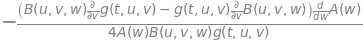

"Element ('w', 't'), of Einstein tensor"

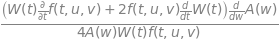

"Element ('w', 'u'), of Einstein tensor"

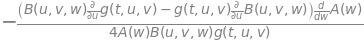

"Element ('w', 'v'), of Einstein tensor"

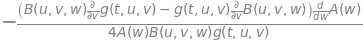

"Element ('w', 'w'), of Einstein tensor"

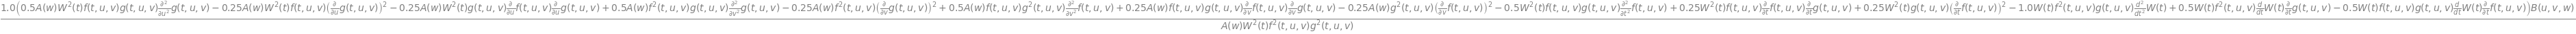

In [2]:
A = sp.Function("A")(w)
B = sp.Function("B")(u, v, w)
C = sp.Function("C")(w)

g_ = MetricTensor(
    sp.Array(
        np.diag([A*g, -f, -W**2, -B]
               )
    ),
    syms=[t, u, v, w]
)
    
g_.tensor()

einstein = EinsteinTensor.from_metric(g_)
einstein.tensor()

out = "ds^2 ="
vars_ = ["t", "u", "v", "w"] 

print_ein(einstein)

"Element ('t', 't'), of Einstein tensor"

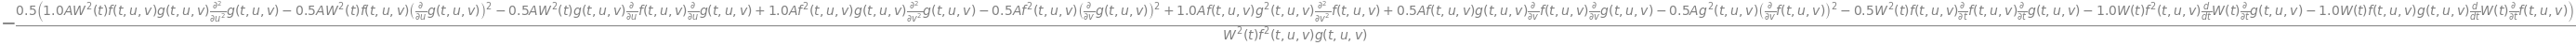

"Element ('t', 'u'), of Einstein tensor"

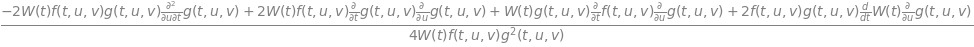

"Element ('t', 'v'), of Einstein tensor"

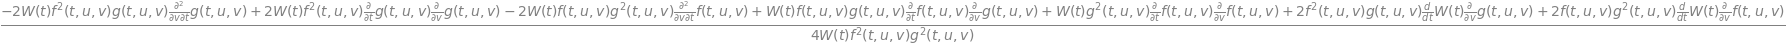

"Element ('u', 't'), of Einstein tensor"

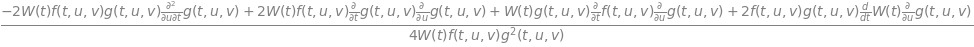

"Element ('u', 'u'), of Einstein tensor"

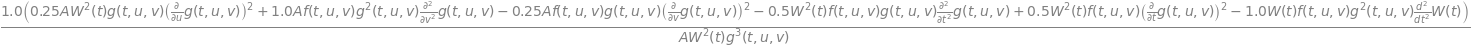

"Element ('u', 'v'), of Einstein tensor"

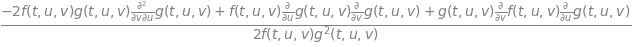

"Element ('v', 't'), of Einstein tensor"

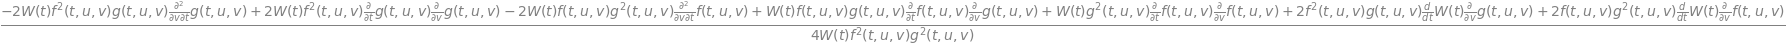

"Element ('v', 'u'), of Einstein tensor"

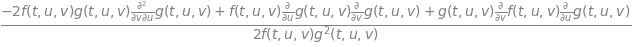

"Element ('v', 'v'), of Einstein tensor"

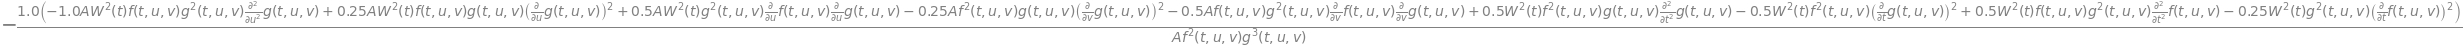

"Element ('w', 'w'), of Einstein tensor"

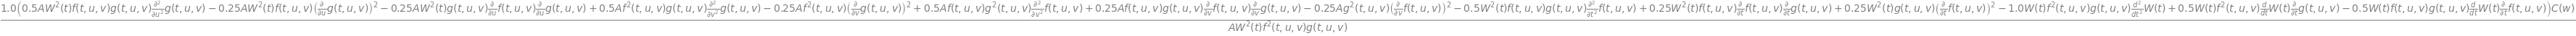

In [4]:
A = sp.Symbol("A")

C = sp.Function("C")(w)
B = C*g


g_ = MetricTensor(
    sp.Array(
        np.diag([A*g, -f, -W**2, -B]
               )
    ),
    syms=[t, u, v, w]
)
    
g_.tensor()

einstein = EinsteinTensor.from_metric(g_)
einstein.tensor()

out = "ds^2 ="
vars_ = ["t", "u", "v", "w"] 

print_ein(einstein)

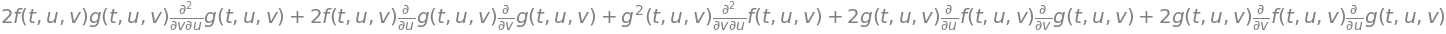

In [7]:
(g**2*f).diff(u).diff(v)